In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

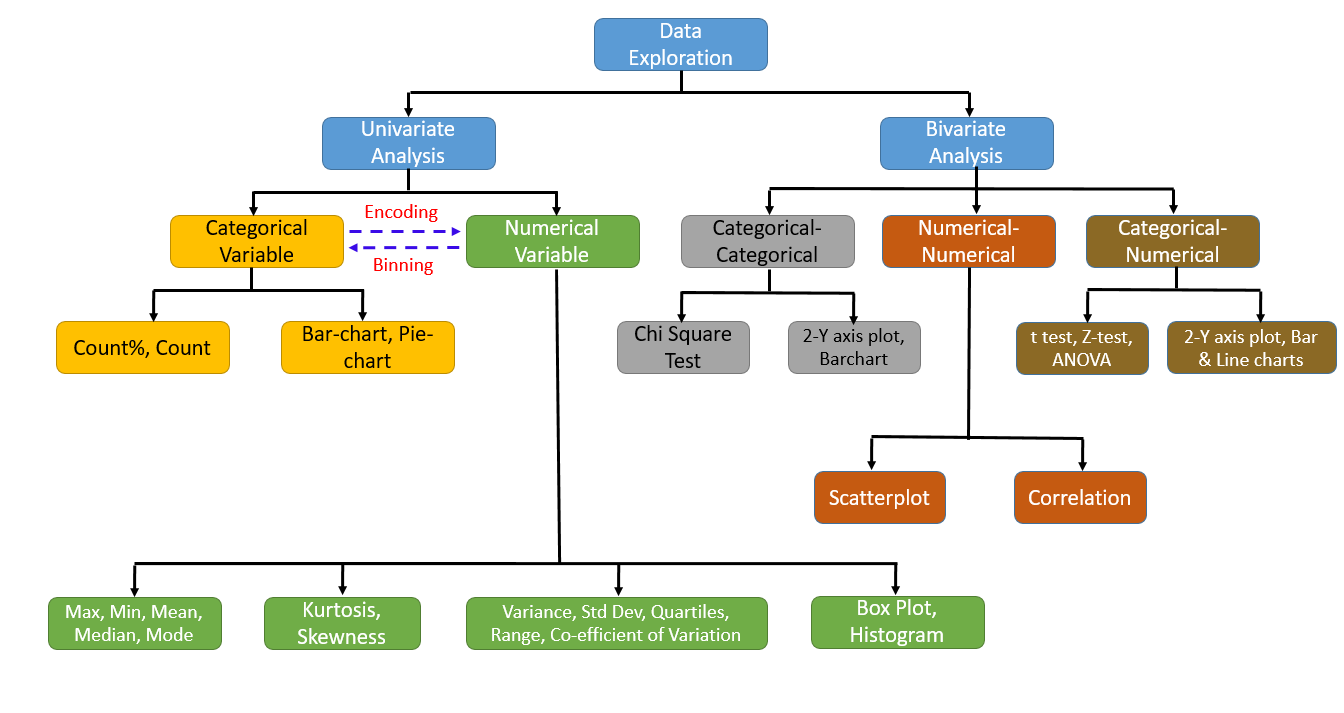

In [2]:
from IPython.display import Image
Image(filename="download.png")
#image Refference:nitinkaushik01

# Data Discovery
- Discover Variables types and their summary statistics, eg info, description, skewness, Kurtosis.

In [2]:
df = pd.read_csv('iris.csv', index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [4]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Skewness.
for col in df.columns:
    if df[col].dtype != 'object':
        print(f'{col}: {scipy.stats.skew(df[col])}')

SepalLengthCm: 0.3117530585022963
SepalWidthCm: 0.330702812773315
PetalLengthCm: -0.2717119501716388
PetalWidthCm: -0.10394366626751729


SepalLengthCm: -0.5735679489249765
SepalWidthCm: 0.24144329938318343
PetalLengthCm: -1.3953593021397128
PetalWidthCm: -1.3352456441311857


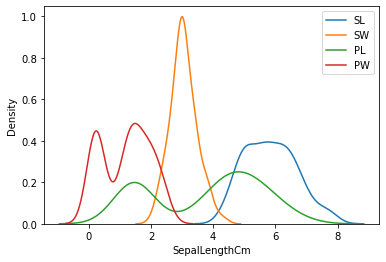

In [19]:
# Kurtosis.
for col in df.columns:
    if df[col].dtype != 'object':
        print(f'{col}: {scipy.stats.kurtosis(df[col])}')
sns.kdeplot(x=df["SepalLengthCm"], label='SL')
sns.kdeplot(x=df["SepalWidthCm"], label='SW')
sns.kdeplot(x=df["PetalLengthCm"], label='PL')
sns.kdeplot(x=df["PetalWidthCm"], label='PW')
plt.legend()
plt.show()

# Univariate Analysis

### Categorical Variables
- A categorical variable is a variable that may take on one of a set of labels

In [172]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

#### Count

In [173]:
freq_table = df.groupby(['Species']).size().reset_index(name='Count').rename(columns={'Sepcies':'Species'})
freq_table

,Species,Count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


#### Percentage count

In [174]:
freq_table['Count%'] = freq_table['Count']/sum(freq_table['Count'])*100
freq_table

,Species,Count,Count%
0,Iris-setosa,50,33.333333
1,Iris-versicolor,50,33.333333
2,Iris-virginica,50,33.333333


#### Barchart 
A bar chart is a graphical representation of the categories as bars. A bar chart can be plotted vertically or horizontally.

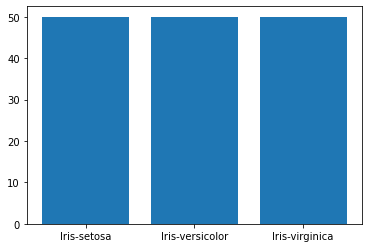

In [175]:
plt.bar(freq_table['Species'], freq_table['Count'])
plt.show()

## Numerical Variables

### SepalWidthCm

#### Mean

In [176]:
df["SepalWidthCm"].mean()

3.0540000000000007

#### Maximum

In [177]:
df["SepalWidthCm"].max()

4.4

#### Minimum

In [178]:
df["SepalWidthCm"].min()

2.0

#### Median

In [179]:
df["SepalWidthCm"].median()

3.0

#### mode

In [180]:
df["SepalWidthCm"].mode()

0    3.0
dtype: float64

#### Describe Statistics

In [181]:
df['SepalWidthCm'].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64

#### Histogram
A histogram is an approximate representation of the distribution of numerical data

Text(0, 0.5, 'count')

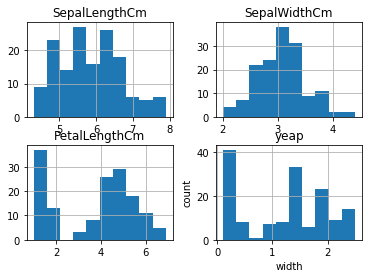

In [182]:
df.hist()
plt.title("yeap")
plt.xlabel('width')
plt.ylabel('count')

#### Box plot
- Method for graphically depicting groups of numerical data through their quartiles. 
- Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles,

Text(0, 0.5, 'count')

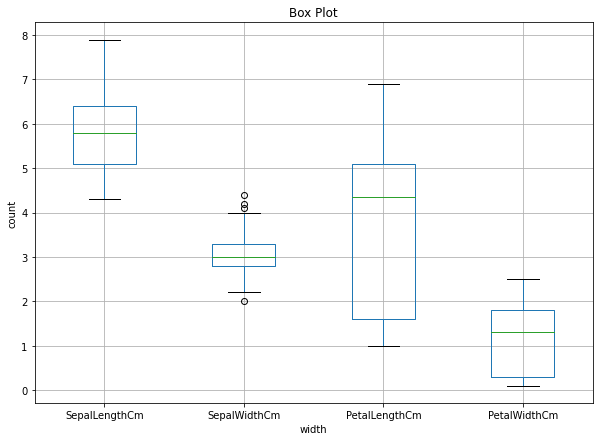

In [183]:
plt.figure(figsize = (10,7))
df.boxplot()
plt.title("Box Plot")
plt.xlabel('width')
plt.ylabel('count')

### Convert numerical variable to  categorical variable

##### Bin
- Binning is a way to group a number of more or less continuous values into a smaller number of "bins".
- Binning method is used to smoothing data or to handle noisy data. 
- In this method, the data is first sorted and then the sorted values are distributed into a number of buckets or bins. 
- The original data values which fall into a given small interval, a bin, are replaced by a value representative of that interval, often the central value.

In [20]:
print(df.head())
print(df['SepalLengthCm'].min())
print(df['SepalLengthCm'].max())

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa
4.3
7.9


In [21]:
sepal_length_ranges = [f"{SepalLengthCm + 0.1} - {SepalLengthCm + 1}" for SepalLengthCm in range(4, 8, 1)]
sepal_length_ranges

['4.1 - 5', '5.1 - 6', '6.1 - 7', '7.1 - 8']

In [186]:
count_sepal_length_ranges = len(sepal_length_ranges)
count_sepal_length_ranges

4

In [187]:
#df['SepalLengthCm_Range'] = pd.cut(x=df['SepalLengthCm'], bins=count_sepal_length_ranges, labels=sepal_length_ranges)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Binning Function

In [22]:
# Define the function which take two argument, the range of bins as rng and the 'SepalLengthCm' as x column.
def binSepals(rng,x):
    # loop through the bins and split each of them to obtain the upper and lower boundaries for each bin.
    for i in rng:
        lower = i.split(' - ')[0]
        upper = i.split(' - ')[1]
        # Check the range in which each value of the of SepalLengthCm lies.
        if float(x) <= float(upper) and float(x)  >= float(lower):
            # return the bin.
            return f'({i})'
                
                
df['SepalLengthCm_Range'] = df['SepalLengthCm'].apply(lambda x: binSepals(sepal_length_ranges,x))

In [190]:
df.head(20)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLengthCm_Range
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,(5.1 - 6)
2,4.9,3.0,1.4,0.2,Iris-setosa,(4.1 - 5)
3,4.7,3.2,1.3,0.2,Iris-setosa,(4.1 - 5)
4,4.6,3.1,1.5,0.2,Iris-setosa,(4.1 - 5)
5,5.0,3.6,1.4,0.2,Iris-setosa,(4.1 - 5)
6,5.4,3.9,1.7,0.4,Iris-setosa,(5.1 - 6)
7,4.6,3.4,1.4,0.3,Iris-setosa,(4.1 - 5)
8,5.0,3.4,1.5,0.2,Iris-setosa,(4.1 - 5)
9,4.4,2.9,1.4,0.2,Iris-setosa,(4.1 - 5)


In [23]:
sepal_len_hist_df = df['SepalLengthCm_Range'].value_counts()
sepal_len_hist_df

(5.1 - 6)    57
(6.1 - 7)    49
(4.1 - 5)    32
(7.1 - 8)    12
Name: SepalLengthCm_Range, dtype: int64

In [24]:
df_range_hist = pd.DataFrame(sepal_len_hist_df).reset_index()
df_range_hist.columns = ['SepalLengthCm_Range', 'Count']
df_range_hist

,SepalLengthCm_Range,Count
0,(5.1 - 6),57
1,(6.1 - 7),49
2,(4.1 - 5),32
3,(7.1 - 8),12


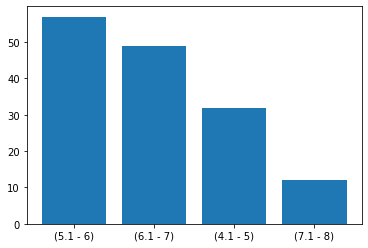

In [25]:
plt.bar(df_range_hist["SepalLengthCm_Range"], df_range_hist["Count"])
plt.show()

#  Bi-Variate Analysis

### Numerical-Numerical Variable Analysis

#### Scatter Plot
A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data.
- It shows the relationship between the two variables

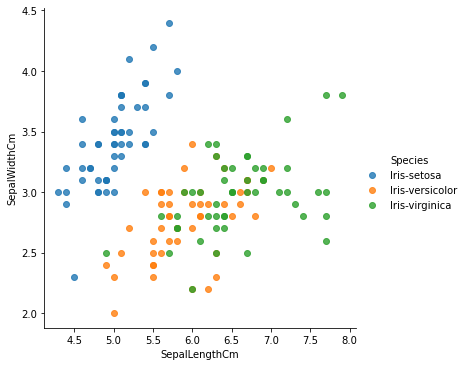

In [26]:
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', fit_reg=False, data=df)

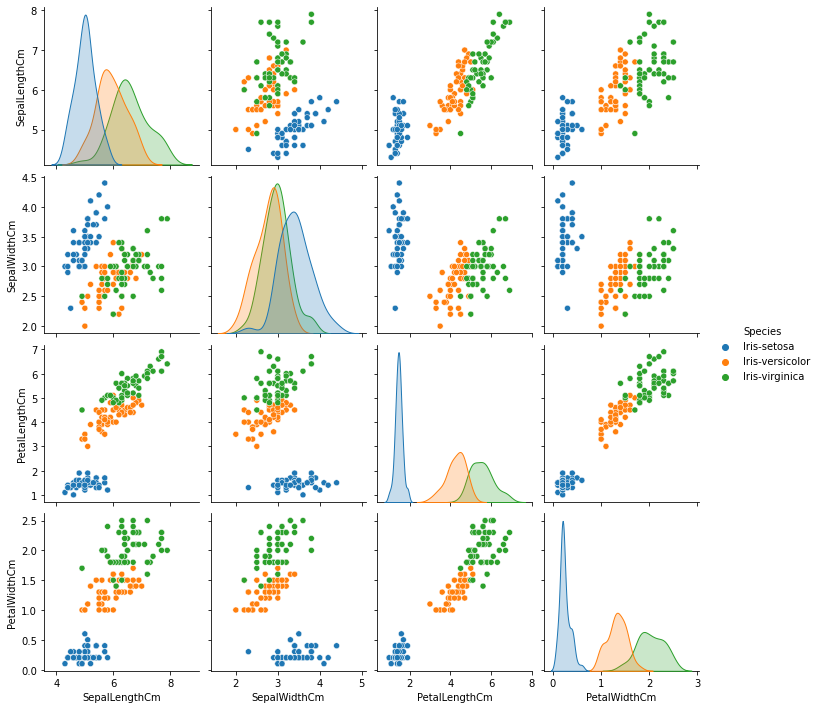

In [27]:
#Scatter Plot Matrix
sns.pairplot(hue='Species', data=df)

#### Correlation
Correlation or dependence is any statistical relationship between two random variables or bivariate data.
In the broadest sense correlation is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related (meaning they change together at a constant rate). It's a common tool for describing simple relationships without making a statement about the effect.
Correlation coefficients are used to measure the strength of the linear relationship between two variables.

A correlation coefficient greater than zero indicates a positive relationship while a value less than zero signifies a negative relationship

A value of zero indicates no relationship between the two variables being compared.

A negative correlation, or inverse correlation, is a key concept in the creation of diversified portfolios that can better withstand portfolio volatility.

Calculating the correlation coefficient is time-consuming, so data are often plugged into a calculator, computer, or statistics program to find the coefficient.

In [28]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Categorical-Categorical Variables

In [29]:
df2 = pd.read_csv('Train.csv')
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [38]:
df2.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

In [30]:
pd.crosstab(df2.Item_Type,df2.Outlet_Size)

Outlet_Size,High,Medium,Small
Item_Type,,,
Baking Goods,73,203,187
Breads,25,83,71
Breakfast,13,36,30
Canned,65,217,189
Dairy,80,218,198
Frozen Foods,92,274,249
Fruits and Vegetables,142,413,328
Hard Drinks,23,75,50
Health and Hygiene,61,170,136


In [33]:
df_plot = df2.groupby(['Outlet_Size']).Item_Type.value_counts().reset_index(name='Counts')
df_plot.head()

,Outlet_Size,Item_Type,Counts
0,High,Fruits and Vegetables,142
1,High,Snack Foods,125
2,High,Household,103
3,High,Frozen Foods,92
4,High,Dairy,80


<AxesSubplot:xlabel='Item_Type', ylabel='Counts'>

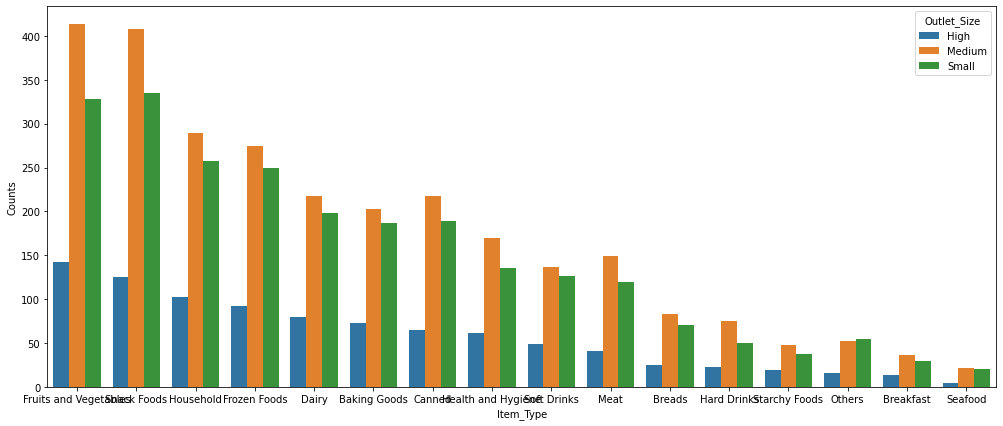

In [34]:
figure = plt.figure(figsize=(17,7))
#df_plot.plot(x=df_plot.index, kind='bar', stacked=True)
sns.barplot(data=df_plot, x='Item_Type', y='Counts', hue='Outlet_Size')

In [35]:
df_mean = df.groupby(['Species']).mean().reset_index()
df_mean

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,Iris-setosa,5.006,3.418,1.464,0.244
1,Iris-versicolor,5.936,2.770,4.260,1.326
2,Iris-virginica,6.588,2.974,5.552,2.026


<BarContainer object of 3 artists>

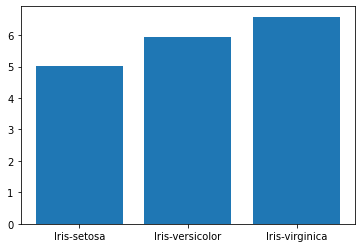

In [79]:
plt.bar(df_mean['Species'], df_mean['SepalLengthCm'])

## END ✌✌